In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [32]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

Found 1658 files belonging to 4 classes.


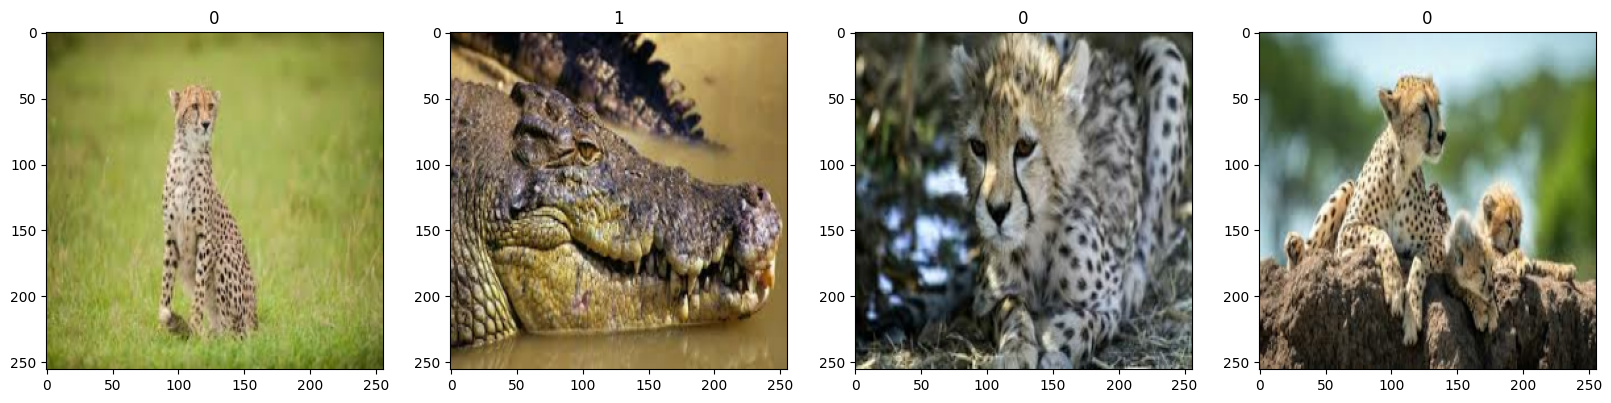

In [33]:
# Load the dataset
data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\Rutvik Rathva\\OneDrive\\Desktop\\learner_space_ML\\data',
    image_size=(256, 256),  # Adjust based on your dataset
    batch_size=32,  # Adjust batch size as needed
    label_mode='int'  # You can use 'categorical' or 'binary' based on your labels
)

# Create numpy iterator for data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Visualize the labels given to different animals
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()


In [34]:
data = data.map(lambda x, y: (x / 255.0, y))


In [35]:
train_size = int(0.8 * len(data))  # Adjust based on your dataset
val_size = int(0.1 * len(data))  # Adjust based on your dataset
test_size = int(0.1 * len(data))  # Adjust based on your dataset

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)


In [36]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes: elephants, tigers, cheetahs, crocodiles
])


In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [41]:
history = model.fit(train_data, epochs=15, validation_data=val_data)


Epoch 1/15


41/41 [==============================] - 50s 1s/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.3241 - val_accuracy: 0.9312
Epoch 2/15
41/41 [==============================] - 47s 1s/step - loss: 0.0294 - accuracy: 0.9939 - val_loss: 0.3814 - val_accuracy: 0.9250
Epoch 3/15
41/41 [==============================] - 47s 1s/step - loss: 0.0268 - accuracy: 0.9909 - val_loss: 0.4272 - val_accuracy: 0.8938
Epoch 4/15
41/41 [==============================] - 47s 1s/step - loss: 0.0632 - accuracy: 0.9794 - val_loss: 0.4257 - val_accuracy: 0.8813
Epoch 5/15
41/41 [==============================] - 48s 1s/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.2592 - val_accuracy: 0.9500
Epoch 6/15
41/41 [==============================] - 48s 1s/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.2193 - val_accuracy: 0.9375
Epoch 7/15
41/41 [==============================] - 47s 1s/step - loss: 0.0359 - accuracy: 0.9870 - val_loss: 0.1249 - val_accuracy: 0.9750
Epoch 8/15
41/41 [=============

In [39]:
loss, accuracy = model.evaluate(test_data)

print(f'Test accuracy: {accuracy}')


5/5 [==============================] - 7s 237ms/step - loss: 0.3334 - accuracy: 0.9062
Test accuracy: 0.90625
